## Bigram form scratch with out Neural Network

In [3]:
words = open('names.txt', 'r').read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

In [7]:
b = {}
for w in words:
    chs = ['<start>'] + list(w) + ['<end>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [8]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<end>'), 6763),
 (('a', '<end>'), 6640),
 (('a', 'n'), 5438),
 (('<start>', 'a'), 4410),
 (('e', '<end>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<start>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<start>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<end>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<start>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<end>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<start>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<end>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<start>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<start>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<start>', 'l'), 1572),
 (('<start>', 'c'), 1542)

In [9]:
import torch

In [10]:
N = torch.zeros((27,27), dtype=torch.int32)

In [11]:
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [12]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

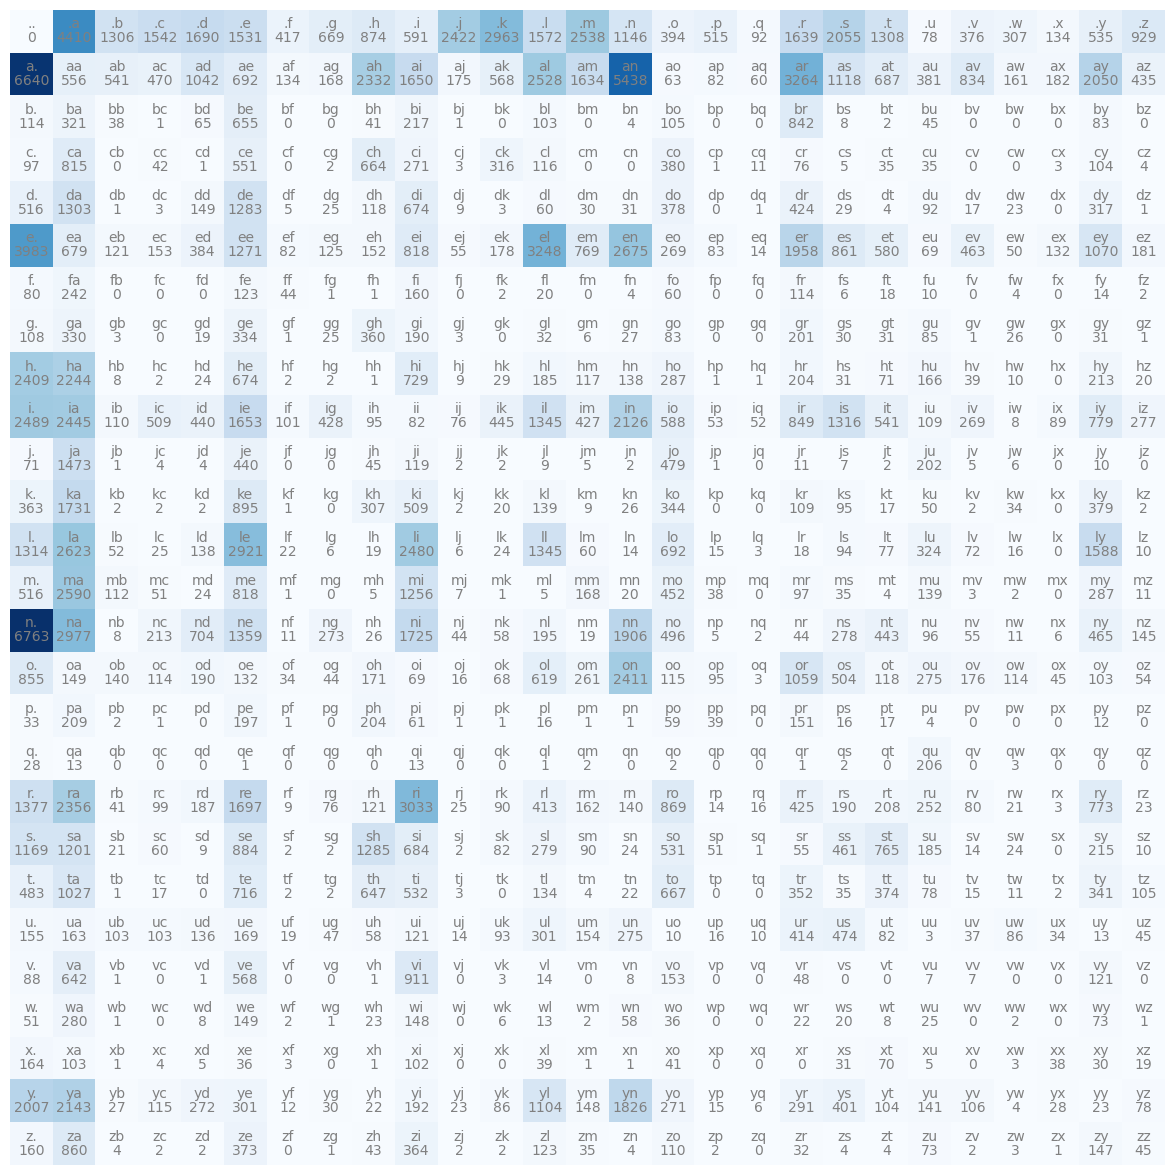

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,15))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off');

In [14]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [513]:
# converting it into probability
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [16]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [519]:
P = (N+1).float()
P /= P.sum(1, keepdim = True)

In [29]:
P[0].sum()

tensor(1.)

In [31]:
P.sum(1, keepdims = True).shape

torch.Size([27, 1])

In [33]:
P.shape

torch.Size([27, 27])

In [523]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    l = []
    ix = 0
    while True:
        p = P[ix]                 # applied through broadcasting
        #p = N[ix].float()        # for trained model
        #p = p/p.sum()
        #p = torch.ones(27)/27.0   # for untrained model
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        l.append(itos[ix])
        if ix == 0:
            break
    print(''.join(l))

junide.
janasah.
p.
cony.
a.


In [37]:
P[0,5]

tensor(0.0478)

In [39]:
log_likelihood = 0
m = 0
for w in words:
#for w in ['hamza']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        m += 1
        #print(f'{ch1}{ch2}:{prob: .4f}: {log_prob:.4f}')
print(f'{log_likelihood = }')
nll = -log_likelihood
print(f'{nll = }')
print(f'cost = {nll/m}')

log_likelihood = tensor(-559951.5625)
nll = tensor(559951.5625)
cost = 2.4543561935424805


## Now starting to create with Neural Network

In [425]:
#spliting data in to training and testing (x, y)
x = []
y = []
for w in words:
    l = ['.'] + list(w) + ['.']
    for ix1, ix2 in zip(l, l[1:]):
        x.append(stoi[ix1])
        y.append(stoi[ix2])
xs = torch.tensor(x)
ys = torch.tensor(y)
num = xs.nelement()
print('Number of examples:', num)

Number of examples: 228146


In [427]:
#applying one hot encoding
import torch.nn.functional as F
x_enc = F.one_hot(xs, num_classes = 27).float()  # 27 for 27 characters
y_enc = F.one_hot(ys, num_classes = 27).float()

In [479]:
x_enc.shape

torch.Size([228146, 27])

In [431]:
# initialize the weights from random
g = torch.Generator().manual_seed(2147483647)
w = torch.randn((27,27), generator=g, requires_grad = True)

In [491]:
#applying the gradient descent
for h in range(100):
    # apply the forward pass
    logits = x_enc @ w
    counts = logits.exp()
    probs = counts/ counts.sum(1, keepdims = True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(w**2).mean()
    #backward pass
    w.grad = None
    loss.backward()
    #update weights
    w.data +=  -0.2*w.grad
print(loss.item())

2.4852681159973145


In [507]:
# predicting the next words
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes = 27).float()
        logits = xenc @ w
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdims = True)
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
prelay.
a.
nn.
kohin.
tolian.
juee.
kilanaauranilevias.
dedainrwieta.
